**CII4Q3 Visi Komputer**

---



#Exercise 4: Membuat Klasifikasi dengan SVM tanpa ekstrasi Fitur

---

<p>Nama  = Reynhard Powiwi - Muhammad Fadhil Fadhlurrahman </p>
<p>NIM   = 1301204091 - 1301204439 </p>
<p>Kelas = IF-44-PIL-IS01 📚👨‍🎓</p>

---

Buat program klasifikasi cats vs dogs menggunakan supervised learning. Disini kami menggunakan Support Vector Machine (SVM)



##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.svm import SVC
from sklearn.metrics import classification_report

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      brightness_range=[0.8, 1.2], #tambahkan brightness untuk variasi kecerahan gambar.
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit(
      train_generator,
      steps_per_epoch=60,  # 2000 images = batch_size * steps
      epochs=60,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)



--2023-10-23 13:06:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   211MB/s    in 0.3s    

2023-10-23 13:06:43 (211 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/60
60/60 - 19s - loss: 0.7097 - accuracy: 0.5192 - val_loss: 0.6900 - val_accuracy: 0.5000 - 19s/epoch - 316ms/step
Epoch 2/60
60/60 - 11s - loss: 0.6969 - accuracy: 0.5267 - val_loss: 0.6903 - val_accuracy: 0.6350 - 11s/epoch - 182ms/step
Epoch 3/60
60/60 - 11s - loss: 0.6930 - accuracy: 0.5625 - val_loss: 0.6811 - val_accuracy: 0.5070 - 11s/epoch - 178ms/step
Epoch 4/60
60/60 - 10s - loss: 0.6880 - accuracy: 0.5717 - val_loss: 0.6637 - val_accuracy: 0.5970 - 10s/epoch - 165ms/step
Epoch 5/60
60/60 - 11s - loss: 0.6634 - accuracy: 0.6108 - val_loss: 0.5945 - val_accuracy: 0.6790 - 11s/epoch - 179ms/step
Epoch 6/60
60/60 - 11s - loss: 0.6555 - accuracy: 0.6017 - val_loss: 0.6106 - val_accuracy: 0.6750 - 11s/epoch - 181ms/step
Epoch 7/60
60/60 - 11s - loss: 0.6398 - accuracy: 0.6367 - val_loss: 0.6565 - val_accuracy: 0.6220 - 11s/epoch - 187ms/step
Epoch 8/60
60/60 - 11s - loss: 0.6185 - accuracy

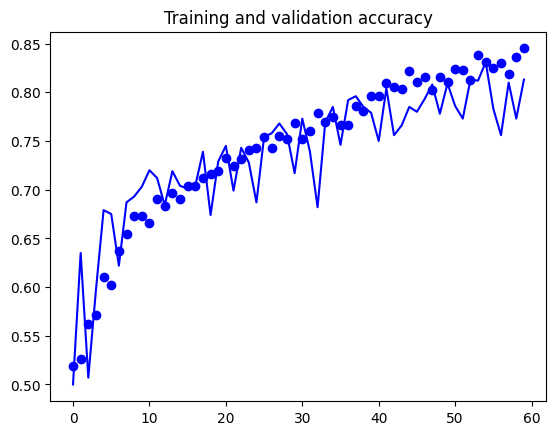

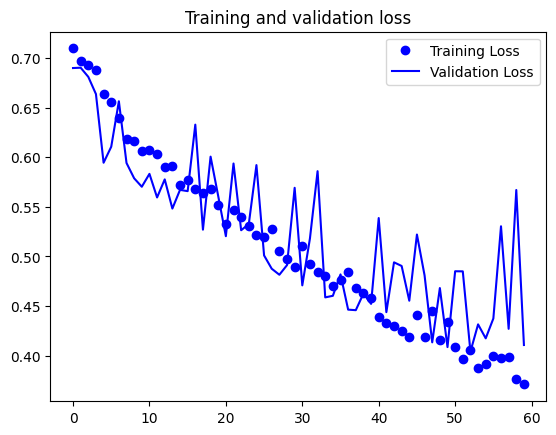

In [2]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Klasifikasi dengan SVM tanpa menggunakan ekstraksi fitur

In [3]:
# Membuat Klasifikasi SVM
svm_classifier = SVC(kernel='linear')



**Mengubah Bentuk Data Latih**

Data latih diambil dari generator data train_generator. Data awal ini dalam bentuk tensor yang merupakan hasil keluaran dari model jaringan saraf tiruan (neural network) sebelumnya. Data ini kemudian diubah bentuk (reshaped) menjadi matriks dua dimensi (2D) dengan dimensi (num_samples, feature_vector_length). Panjang vektor fitur (feature_vector_length) adalah hasil perkalian dari lebar,tinggi, dan jumlah saluran warna pada gambar yang digunakan, yaitu 150x150x3.

In [4]:
train_data, train_labels = train_generator.next()
num_samples, feature_vector_length = train_data.shape[0], train_data.shape[1] * train_data.shape[2] * train_data.shape[3]
train_data = train_data.reshape(num_samples, feature_vector_length)

**Melatih Klasifikasi SVM**

Klasifikasi SVM dilatih (fit) menggunakan data latih yang sudah diubah bentuk. Ini berarti SVM belajar untuk menentukan batas keputusan yang memisahkan gambar-gambar kucing dari gambar-gambar anjing. Model SVM disesuaikan dengan data latih sehingga dapat mengklasifikasikan gambar-gambar tersebut dengan benar.

In [5]:
svm_classifier.fit(train_data, train_labels)

SVC(kernel='linear')

**Merubah Bentuk Data Validasi**

Langkah selanjutnya adalah melakukan hal yang sama pada data validasi. Data validasi diambil dari generator data validation_generator, kemudian diubah bentuk ke dalam format yang sesuai dengan yang digunakan untuk data latih.

In [6]:
validation_data, validation_labels = validation_generator.next()
num_samples, feature_vector_length = validation_data.shape[0], validation_data.shape[1] * validation_data.shape[2] * validation_data.shape[3]
validation_data = validation_data.reshape(num_samples, feature_vector_length)

**Menggunakan Klasifikasi SVM untuk Prediksi**

Setelah klasifikasi SVM dilatih dan data validasi sudah diubah bentuk, model SVM digunakan untuk melakukan prediksi pada data validasi. Ini berarti SVM akan mengklasifikasikan gambar-gambar validasi ke dalam dua kelas, "Kucing" atau "Anjing."

In [7]:
predictions = svm_classifier.predict(validation_data)

**Evaluasi Klasifikasi**

Terakhir, kode tersebut menggunakan perpustakaan sklearn untuk membuat laporan evaluasi klasifikasi. Laporan ini mencakup sejumlah metrik evaluasi seperti akurasi, presisi, dan lainnya, yang mengukur seberapa baik klasifikasi dilakukan. Hasil laporan ini dicetak ke layar dengan print(report).

In [8]:
# Create a label mapping dictionary
label_mapping = {0.0: 'Kucing', 1.0: 'Anjing'}

# Map the predictions and validation labels to the descriptive labels
predictions_descriptive = [label_mapping[label] for label in predictions]
validation_labels_descriptive = [label_mapping[label] for label in validation_labels]

# Evaluate the classifier
report = classification_report(validation_labels_descriptive, predictions_descriptive)
print(report)

              precision    recall  f1-score   support

      Anjing       0.33      0.38      0.35         8
      Kucing       0.55      0.50      0.52        12

    accuracy                           0.45        20
   macro avg       0.44      0.44      0.44        20
weighted avg       0.46      0.45      0.45        20



*   **Precision**: Precision mengukur sejauh mana model memprediksi dengan benar kelas positif. Dalam kasus ini, precision untuk kelas Anjing adalah 0.33, yang berarti model masih kurang berhasil dalam memprediksi Anjing. Precision untuk Kucing adalah 0.55, yang berarti dari semua gambar yang diprediksi sebagai kucing, hanya sekitar 55% benar.
*   **Recall**: Recall mengukur sejauh mana model berhasil menemukan semua instance kelas yang benar. Recall untuk kelas Anjing adalah 0.38, yang berarti model masih kurang berhasil menemukan Anjing. Recall untuk kelas Kucing adalah 0.50, yang berarti model juga masih belum berhasil menemukan kucing.
*   **F1-Score**: F1-score adalah rata-rata harmonik dari precision dan recall. F1-score untuk kelas Anjing adalah 0.35, yang menunjukkan kinerja yang sangat buruk. F1-score untuk kelas Kucing adalah 0.52, yang menunjukkan bahwa model lebih baik dalam mendeteksi gambar anjing.
*   **Support**: Ini adalah jumlah instance yang termasuk dalam masing-masing kelas dalam dataset validasi. Ada 12 gambar kucing  dan 8 gambar anjing dalam dataset validasi.
*   **Accuracy**: Akurasi adalah ukuran dari sejauh mana model benar-benar memprediksi kelas yang benar. Namun, dalam kasus ini, akurasi hanya 0.45, yang menunjukkan bahwa model tidak berhasil dengan baik dalam melakukan klasifikasi

Dalam keseluruhan, laporan ini menunjukkan bahwa model mengalami masalah dengan precision dan recall yang sangat rendah. Hal ini mungkin disebabkan oleh kita tidak menggunakan ekstrasi fitur, namun hanya langsung mengklasifikasi sehingga hasil klasifikasi masih buruk